In [1]:
import itertools
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC

sortedFeatureCorr = pd.read_csv("dataset/corr.csv")
data = pd.read_csv("dataset/preprocessed.csv")

In [2]:
first_feature_count =           11
last_feature_count =            10

In [3]:
a = sortedFeatureCorr.iloc[:, 0].values

In [4]:
for i in range(first_feature_count, sortedFeatureCorr.shape[0] - last_feature_count):
    data = data.drop(a[i], axis = 1)
data = data.drop(list(data.columns)[0], axis = 1)


In [5]:
data_npWNan = data.iloc[:, :].values

data_np = data_npWNan[data_npWNan[:,-1]!= -1 ]
unique_elements, counts_elements = np.unique(data_np[:,-1], return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     1      2      3      4      5]
 [ 78815  87257 136412 183844 275766]]


In [6]:
feature = data_np[:, :-1]
target = data_np[:, -1]

In [7]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

params = {'C':[1]}
feature_map_nystroem = Nystroem(gamma = .2, random_state = 1)
data_transformed = feature_map_nystroem.fit_transform(X_train)
cv_transformed = feature_map_nystroem.transform(X_val)
linear_svc = LinearSVC(class_weight = 'balanced', max_iter = 1000)
grid = GridSearchCV(linear_svc, param_grid = params, n_jobs=-1, verbose = 1)

In [10]:
# time at which model starts training 
results = dict()
train_start_time = datetime.now()
print('training the model..')
grid.fit(X_train, y_train)
print('Done \n \n')
train_end_time = datetime.now()
results['training_time'] =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
# predict test data
print('Predicting test data')
test_start_time = datetime.now()
y_pred = grid.predict(X_test)
test_end_time = datetime.now()
print('Done \n \n')
results['testing_time'] = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
results['predicted'] = y_pred

training the model..
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:21:14.949581


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015014




C:\Users\oneri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.3min finished
C:\Users\oneri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


---------Performance Score--------------

 Micro F1:0.42268352370767426

 Precision:0.42268352370767426

 Recall:0.42268352370767426

 Accuracy:0.42268352370767426

--------------------
| Confusion Matrix |

 [[11533   454   153   860  2969]
 [ 6947   851   368  2014  7231]
 [ 4806  1158   790  4657 15785]
 [ 2650   965   931  7116 25150]
 [ 1918   673   859  7446 44135]]
-------------------------
| Classifiction Report |
              precision    recall  f1-score   support

           1       0.41      0.72      0.53     15969
           2       0.21      0.05      0.08     17411
           3       0.25      0.03      0.05     27196
           4       0.32      0.19      0.24     36812
           5       0.46      0.80      0.59     55031

    accuracy                           0.42    152419
   macro avg       0.33      0.36      0.30    152419
weighted avg       0.36      0.42      0.34    152419



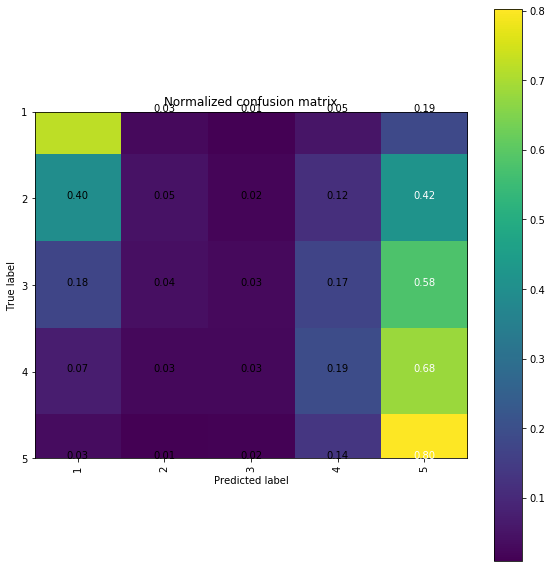

In [19]:
print('---------Performance Score--------------')
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision= precision_score(y_true=y_test, y_pred=y_pred,average='micro')
recall = recall_score(y_true=y_test, y_pred=y_pred,average='micro')
micro_f1 = f1_score(y_true=y_test, y_pred=y_pred,average='micro')
print('\n Micro F1:{}'.format(micro_f1))
print('\n Precision:{}'.format(precision))
print('\n Recall:{}'.format(recall))
print('\n Accuracy:{}\n'.format(accuracy))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
results['confusion_matrix'] = cm

print('--------------------')
print('| Confusion Matrix |')
print('\n {}'.format(cm))
    
# plot confusion matrix
plt.figure(figsize = (8,8))
plt.grid(b = False)
labels = ['1','2','3', "4", "5"]

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# get classification report
print('-------------------------')
print('| Classifiction Report |')
# store report in results
results['classification_report'] = classification_report
print(classification_report)

# add the trained  model to the results
results['model'] = grid
